In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
dt = 0.2
header = ["DMagnitude", "X", "Y", "Z"]
name = "data/dati_oggetto_"
"""
P = Paloncino
F = Ferro
L = Legno
M = Metallic Can
"""
objects_indexes = {1 : "P", 2 : "F", 3 : "L", 4 : "P", 5 : "F", 6 : "F", 7 : "P", 8 : "P", 9 : "P", 10 : "L", 11 : "M"}
resistance_indexes = {"P" : "S", "F" : "H", "L" : "H", "M" : "S"}

In [4]:
def res_color(res):
    color_map = {"S" : "green", "M" : "blue", "H" : "red"}
    return color_map[res]

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def linear_regr(x, y):
    x = x.reshape(-1,1)
    model = LinearRegression()
    model.fit(x, y)
    coef =  model.coef_
    intercept =  model.intercept_
    return model.predict(x), coef, intercept

In [6]:
def peak_position(x, y):
    max_idx = y.index(max(y))
    return x[max_idx], y[max_idx]

In [7]:
max_index = 12

In [8]:
def plot_data(name, request_data, max_index, dt, lin_reg = False, peak_view = False):
    for i in range (1, max_index):
        if i == 7:
            continue
        data = pd.read_csv(f"{name}{i}.csv", header = 0, names = header)
        time = len(data) * dt 
        dmagnitude = data[request_data]
        filtered = [x for x in dmagnitude if x != 0]
        time_step = np.linspace(0, time, len(filtered))
        if lin_reg:
            lin, coef, inter = linear_regr(time_step, filtered)
            plt.plot(time_step, lin, c = res_color(resistance_indexes[objects_indexes[i]]))
            plt.title(f"Linear Regression {request_data} Curve")
        elif peak_view:
            peak_pos_x, peak_pos_y = peak_position(time_step, filtered)
            plt.scatter(peak_pos_x, peak_pos_y, c = res_color(resistance_indexes[objects_indexes[i]]))
            plt.title(f"Peak Position of {request_data}")
        else:
            plt.plot(time_step, filtered, c = res_color(resistance_indexes[objects_indexes[i]]))
            plt.title(f"{request_data} Curve")
        plt.xlabel("Discrete Time Steps")
        plt.ylabel("Dmagnitude Over Time")

        
    plt.show()

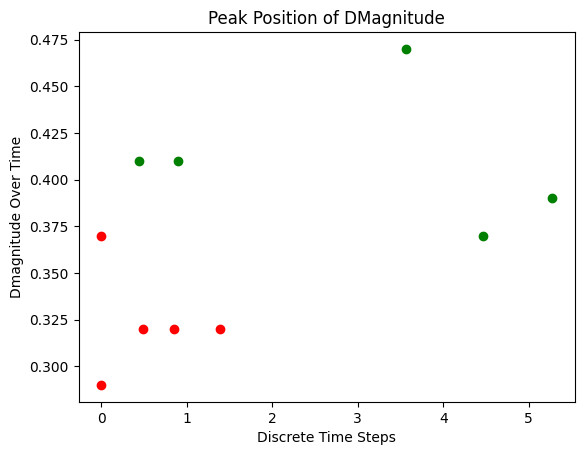

In [9]:
plot_data(name, "DMagnitude", max_index, dt, lin_reg=False, peak_view=True)

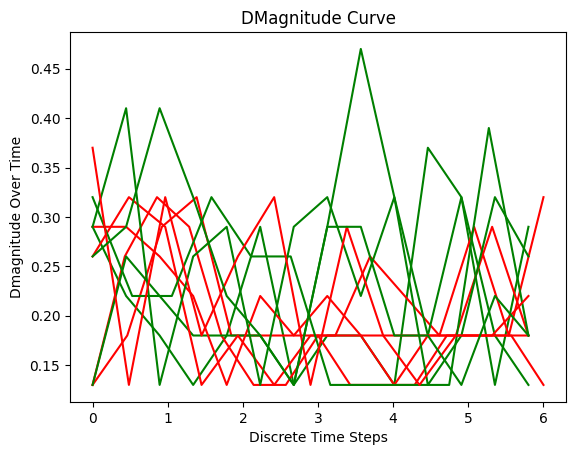

In [10]:
plot_data(name, "DMagnitude", max_index, dt, lin_reg=False)

In [21]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

X = []
y = []
for i in range (1, max_index):
    if i == 7:
            continue
    data = pd.read_csv(f"{name}{i}.csv", header = 0, names = header)
    time = len(data) * dt 
    dmagnitude = data["DMagnitude"]
    filtered = [x for x in dmagnitude if x != 0]
    time_step = np.linspace(0, time, len(filtered))
    peak_pos = peak_position(time_step, filtered)
    X.append(peak_pos)
    y.append(resistance_indexes[objects_indexes[i]])
X = np.array(X)
y = np.array(y)
clf.fit(X, y)

LogisticRegression()

In [30]:
print(X)

[[4.46153846 0.37      ]
 [1.38461538 0.32      ]
 [0.85714286 0.32      ]
 [3.56923077 0.47      ]
 [0.48333333 0.32      ]
 [0.         0.29      ]
 [0.44615385 0.41      ]
 [5.27272727 0.39      ]
 [0.         0.37      ]
 [0.89230769 0.41      ]]


In [24]:
w = clf.coef_[0]
b = clf.intercept_[0]

# To plot the line: w[0]*x + w[1]*y + b = 0
# Solve for y: y = -(w[0]/w[1]) * x - b/w[1]
slope = -w[0] / w[1]
intercept = -b / w[1]